Text(0, 0.5, 'aggregate distance')

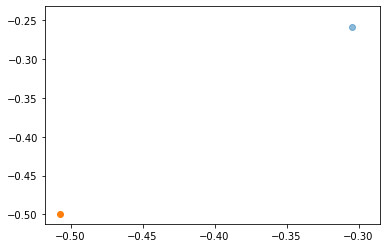

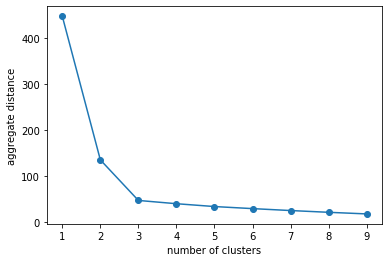

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def get_data():
    # load the data
    data = pd.read_csv('kmeans.csv',header=None).values
    # shuffle data rows 
    np.random.shuffle(data) 
    # shuffle rows
    return data
data = get_data()

#plt.scatter(data[:,0],data[:,1])

def kmeans_clustering(data, K):
    # define the model
    model = KMeans(n_clusters=K)
    # fit the model to data
    model.fit(data)
    centroid = model.cluster_centers_
    labels = model.labels_
    # sum of squared distances of samples to their closest cluster centrer
    distance = model.inertia_
    # define a dict to store each cluster of data points
    cluster_set = {}
    for i,x in enumerate(data):
        xlabel = labels[i]
        if xlabel not in cluster_set.keys():
            cluster_set[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set[xlabel] = np.append(cluster_set[xlabel],np.reshape(x,(1,len(x))), axis=0)
        return centroid, distance, cluster_set
K = 3
centroid, distance, clusters_set = kmeans_clustering(data, K)
# plot clusters
plt.figure(1)
colors = {0:'k',1:'b',2:'g'}
center_color = ['r']
for key in clusters_set.keys():
    cluster = clusters_set[key]
        
plt.scatter(cluster[:,0],cluster[:,1],alpha=0.5)
#,cmap=matplotlib.colors.ListedColormap(colors[key]))
plt.scatter(centroid[key][0],centroid[key][1],alpha=1)
#,cmap=matplotlib.colors.ListedColormap(center_color[0]))

#choose the number of clusters

def agg_distance(data):
    all_distance = []
    for k in range(1,10):
        vector = []
        vector.append(k)
        centroid, distance, clusters_set = kmeans_clustering(data, k)
        vector.append(distance)
        all_distance.append(np.array(vector))
    return np.array(all_distance)
    
all_distance = agg_distance(data)
plt.figure()
plt.plot(all_distance[:,0],all_distance[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('aggregate distance')